# <div style="width:100%;text-align: center;color:darkblue;font-size:70px;font-family:Serif">  Global Comoodity Trade </div>
 
    
*Author: Yousef Moterassed*  
*September 2022*
  
***

# <div style="width:100%;text-align: left;color:darkblue; font-size:35px;font-family:Serif; font-weight:bold; height: 30px"> Introduction</div>

<div style="width:100%;text-align: left;color:black;font-size:21px;font-family:Serif">These days it is inevitable to be involved with the economy and politics since it strongly affects our day-to-day life. So it might be helpful to have a realistic and data-driven sight of the actual situation of the global economy and trading exchanges.

My name is [Yousef Moterassed](https://www.kaggle.com/yousefmoterassed), a Persian borned boy who lives in Samba-Land 🇧🇷. I am working in the trade and business field for many years and after stepping into the Data Science and Data Analysis road, decided to combine these knowledges to be able to uncover some hidden information behind the curtain of the data, and release some data-driven information publicly in which it might help myself and our society to increase their understanding and common knowledge about what's going on in our world's economy.

I hope this project which has been done with Python in the Kaggle platform, would help some of you to have a better vision of what's going on in our world's economy and trades.</div>

## <div style="width:100%;text-align: left;color:darkblue;font-size:30px;font-family:Serif; font-weight:bold; height: 30px">Who are the audience of this work?</div>

<div style="width:100%;text-align: left;color:black;font-size:21px;font-family:Serif">This project has been done in hope to help to improve the <b>public knowledge</b> in the first place. Although some statistical or mathematical terms and calculations in some contents might seem a bit difficult or boring to understand, I will try to facilitate them with simplified visualizations and will be explained in plain English within the <a href='#1'>Explanation and Observation</a> section.

However this is my hope that through the ease of using this project some of our statisticians, civil and public servants, politicians and economists, to help the progress of our societies with their deeper and more technical works.</div>

# About the data

<div style="width:100%;text-align: left;color:black;font-size:21px;font-family:Helvetica">

This dataset was kindly published by the **United Nations** Statistics Division on the **[UNData](http://data.un.org/Explorer.aspx)** site. You can find the original dataset [here](http://data.un.org/Explorer.aspx).

This dataset contain about **8,225,870 entries** and around **1.23 GB** of data.
Some of the numbers on this dataset are more trustworthy than others. I'd expect that British tea imports are fairly accurate, but doubt that Afghanistan exported exactly 51 sheep in 2016. Can we identify which nations appear to have the most trustworthy data? Which industries? 

I will try to reach out to some useful and reliable conclusions at the end and surely will keep updating this notebook with fresh ideas and new techniques I would learn during my DS journey, and I hope you would not withhold your conclusions and opinions about this analysis.
</div>

## Columns explanation

This dataset contains 10 major columns and is defined as below:
1. **country_or_area**: Name of the country or the area in which we will rename it to "Country" for our analysis
2. **year**: This is an annual report, so it is the year in which the trade has taken place
3. **comm_code**: Per the World Customs Organization: The Harmonized Commodity Description and Coding System generally referred to as "Harmonized System" or simply "HS" is a multipurpose international product nomenclature developed by the **World Customs Organization** (WCO). It comprises about 5,000 commodity groups; each identified by a six digit code, arranged in a legal and logical structure and is supported by well-defined rules to achieve uniform classification. For more, see [here](http://www.wcoomd.org/en/topics/nomenclature/overview/what-is-the-harmonized-system.aspx)
4. **commodity**: The description of a particular commodity code, i.e. "Horses, live pure-bred breeding"
5. **flow**: Flow of trade i.e. Export, Import, Re-Import
6. **trade_usd**: Value of the trade in US Dollars ($)
7. **weight_kg**: Weight of the commodity in is the SI unit of mass, Kilograms (Kg)
8. **quantity_name**: A description of the quantity measurement type given the type of item (i.e. Number of Items, Weight in Kilograms, etc.)
9. **quantity**: Count of the quantity of a given item based on the Quantity Name
10. **category**: Category to identify commodity i.e "02 Meat and edible meat offal"


## Licence
License
[Per the UNData terms of use](http://data.un.org/Host.aspx?Content=UNdataUse): all data and metadata provided on UNdata’s website are available free of charge and may be copied freely, duplicated and further distributed provided that [UNdata](http://data.un.org/Explorer.aspx) is cited as the reference.


# What is the purpose of my project?

I have learned from the most impressive person in my life whom her legacy and lessons are in my ears everyday and most imortant of them is that we came to this world to create, not just to consume. And we have to know somethings before creating anything for other human being to use or consume.

Why are we doing this?
For who we are doing it?
When is better to do it?

### Questions to be answered:

1. What is the countries rank in all trading flows?
2. 

1. when was the year with the most import and export records?
2. Visualizing each year import and export records(Out of the item above)
3. Global trades are mostly in import or export segment?
4. Which countries have the most participation in import and export?
5. Verify them in each segment/import and export
6. Which items traded in the most quantity or weight?
7. Put two or three countries in three groups of high/mid/low trade segment and analyze their trends.
8. 
9. Highest exporters imported what products in return?
10. Take a look at your mothersland, iran and brazil segments and trends. Maybe in another notebook 
11. What is the value of export and import traded per year?
12. Does this value affect the world deveoloping velocity?
13. which category is in the high demand?
14. what are the top categories for each countries in those groups you defined?
15. What is the value of the trades per year for those countries?
16. Does those values helped the countries to develop?
17. Which countries exported more than they imported?
18. Whiat products or services serves the world better?
19. Is it real that feeding human being is the priority for the countries? What are ther references?


***

# Preparing our dataset

Here is the very first step of our work, we simply import libraries and call our dataset in a dataframe called `df`

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mlb
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import os
print(os.listdir("../input"))
df= pd.read_csv('../input/global-commodity-trade-statistics/commodity_trade_statistics_data.csv',low_memory=False)

['global-commodity-trade-statistics']


Let us have a quick look at this large data set with only first five rows.

In [2]:
df.head()

,country_or_area,year,comm_code,commodity,flow,trade_usd,weight_kg,quantity_name,quantity,category
0,Afghanistan,2016,010410,"Sheep, live",Export,6088,2339.0,Number of items,51.0,01_live_animals
1,Afghanistan,2016,010420,"Goats, live",Export,3958,984.0,Number of items,53.0,01_live_animals
2,Afghanistan,2008,010210,"Bovine animals, live pure-bred breeding",Import,1026804,272.0,Number of items,3769.0,01_live_animals
3,Albania,2016,010290,"Bovine animals, live, except pure-bred breeding",Import,2414533,1114023.0,Number of items,6853.0,01_live_animals
4,Albania,2016,010392,"Swine, live except pure-bred breeding > 50 kg",Import,14265937,9484953.0,Number of items,96040.0,01_live_animals


Let's see if there is any null value

In [3]:
df.isnull().sum()

country_or_area         0
year                    0
comm_code               0
commodity               0
flow                    0
trade_usd               0
weight_kg          128475
quantity_name           0
quantity           304857
category                0
dtype: int64

Well it seems that we have a great deal of records in weight and quantity columns with null value, but we are not going to drop them for now since it will affect some of our analyzes and visualizations. Also since there are their records in the transactions and categories it will help to understand some overall trends in those categories.

First I would like to **rename** the column name of the **"country_or_area" to "country"** in which would facilitate our works.

In [4]:
df.rename(columns = {'country_or_area':'country'}, inplace = True)

Also we want to know the trade values in million dollars unit, so we will divide all of the records by million.

In [5]:
df['trade_usd']=(df['trade_usd']/1000000).round(2)
df.head()

,country,year,comm_code,commodity,flow,trade_usd,weight_kg,quantity_name,quantity,category
0,Afghanistan,2016,010410,"Sheep, live",Export,0.01,2339.0,Number of items,51.0,01_live_animals
1,Afghanistan,2016,010420,"Goats, live",Export,0.00,984.0,Number of items,53.0,01_live_animals
2,Afghanistan,2008,010210,"Bovine animals, live pure-bred breeding",Import,1.03,272.0,Number of items,3769.0,01_live_animals
3,Albania,2016,010290,"Bovine animals, live, except pure-bred breeding",Import,2.41,1114023.0,Number of items,6853.0,01_live_animals
4,Albania,2016,010392,"Swine, live except pure-bred breeding > 50 kg",Import,14.27,9484953.0,Number of items,96040.0,01_live_animals


# Descriptive and Exploratory Statistics (EDA)

This is important to understand that these days the statistics and mathematical calculations behind it is the inseparable part of any serious analysis. Luckily the efforts of prior scientists made our job way easier than before, since there are some functions in Python like `describe()` and `info()` to calculate all the important statistical tools for us, also to see the data types and entries.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8225871 entries, 0 to 8225870
Data columns (total 10 columns):
 #   Column         Dtype  
---  ------         -----  
 0   country        object 
 1   year           int64  
 2   comm_code      object 
 3   commodity      object 
 4   flow           object 
 5   trade_usd      float64
 6   weight_kg      float64
 7   quantity_name  object 
 8   quantity       float64
 9   category       object 
dtypes: float64(3), int64(1), object(6)
memory usage: 627.6+ MB


We can see that the column year is parsed as `integer`, so we will convert it to `datetime` format and then verify the description of this dataset

In [7]:
df['year']= pd.to_datetime(df['year'], format='%Y')

In [8]:
df.describe(include='all', datetime_is_numeric=True)

,country,year,comm_code,commodity,flow,trade_usd,weight_kg,quantity_name,quantity,category
count,8225871,8225871,8225871,8225871,8225871,8.225871e+06,8.097396e+06,8225871,7.921014e+06,8225871
unique,209,NaN,5040,5031,4,NaN,NaN,12,NaN,98
top,Australia,NaN,TOTAL,ALL COMMODITIES,Import,NaN,NaN,Weight in kilograms,NaN,95_toys_games_sports_requisites
freq,307627,NaN,9185,9185,4848524,NaN,NaN,6617980,NaN,100000
mean,NaN,2004-10-07 17:50:05.544289280,NaN,NaN,NaN,9.505353e+01,3.556503e+07,NaN,2.671470e+08,NaN
min,NaN,1988-01-01 00:00:00,NaN,NaN,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN
25%,NaN,1999-01-01 00:00:00,NaN,NaN,NaN,1.000000e-02,1.089000e+03,NaN,1.062000e+03,NaN
50%,NaN,2005-01-01 00:00:00,NaN,NaN,NaN,1.500000e-01,2.689800e+04,NaN,2.712000e+04,NaN
75%,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,1.900000e+00,4.474432e+05,NaN,4.623620e+05,NaN
max,NaN,2016-01-01 00:00:00,NaN,NaN,NaN,2.443311e+06,1.860133e+12,NaN,1.026357e+15,NaN


This function gives us very interesting information and description about this dataset, such as: 
* the number of countries recorded in this dataset which is counted as **209 distinct countries**. 
* Also, we can see the interval of these records which is between **1988 to 2016**.
* The top country in all segments appears to be **Australia** 
* The import records seem to be more applied than exports.
* There are 98 product categories and the **category code 95** *Toys, Games, Sports requisites* is in the highest records of deals.

We will dive deeper on other items later in other sections.

***

# Analyze

Now we are going to ask our questions one by one. 

## Question 1
### Countries rank in all trading flows

When it comes to global economy the very first question will be in anyone's mind is that what is the ranking of the countries in the trading market. So we can answer this question with a simplified graph

In [9]:
ct=df.groupby('country', as_index=False).sum()
cts=ct.sort_values(by='trade_usd', ascending=False).head(20)


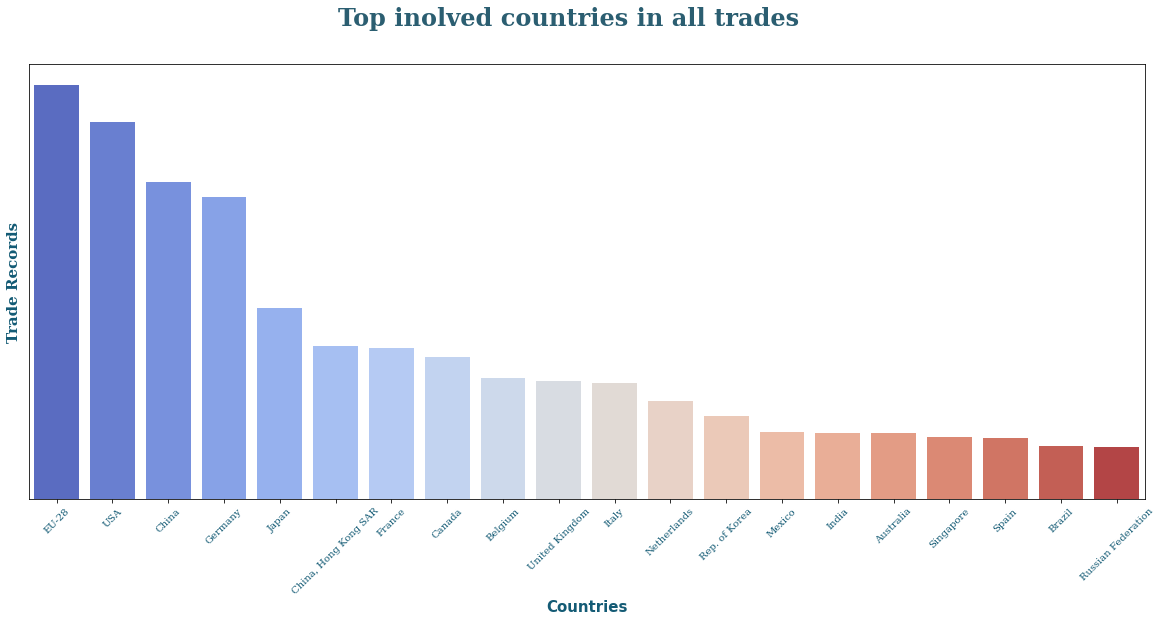

In [10]:
plt.subplots(figsize=(20, 8))
sns.barplot(data=cts, x='country', y='trade_usd', palette='coolwarm')
plt.xticks(rotation=45, color='#145B75', ticks=None,fontfamily='Serif')
plt.yticks([])
#plt.yscale('log')

plt.xlabel('Countries', 
           fontsize=15,
          fontweight='bold',
          color='#145B75')
plt.ylabel('Trade Records',
          fontsize=15,
           fontfamily='Serif',
          fontweight='bold',
          color='#145B75')

plt.suptitle(
    "Top inolved countries in all trades",
    fontsize=24,
    fontfamily='Serif',
    fontweight='bold',
        ha="center",
    color='#2B5E71')

plt.show()

<p style="padding: 10px; font-size:20px; font-family:Serif">Alright we need to interpret this graph. As we can see the top 20 countries in all trading actions including import, export, re-import and re-export are listed in this bar plot and indicates that european union which has 28 members was in the first place until the period of this dataset and after we update the new dataset it might be changed that we will define that later in another notebook.<br><br>
The interesting point is that the first four countries have a significant distance to the rest of the group, and we will verify the reason of that in other section.</p>

## Question 2  
  ### When we had the most trading flows?
  
<p style="padding: 10px; font-size:20px; font-family:Helvetica">It is important to know how was the global trading flow to understand that how the population growth and technology improvement impacted the global trade</p>

In [11]:
cty=df.groupby('year', as_index=False).sum()
ctys=cty.sort_values(by='trade_usd', ascending=False)

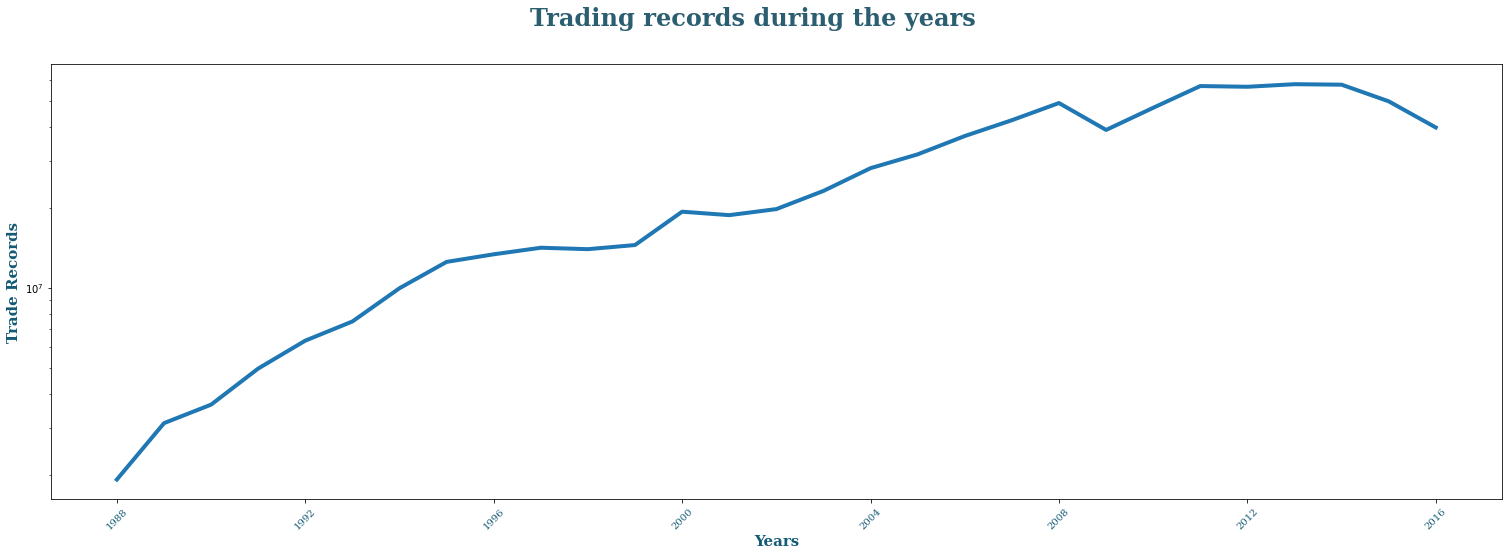

In [12]:
plt.subplots(figsize=(26, 8))
sns.lineplot(data=ctys, x='year', y='trade_usd',linewidth=4)
plt.xticks(rotation=45, color='#145B75', ticks=None,fontfamily='Serif')
plt.yticks([])
plt.yscale('log')

plt.xlabel('Years', 
           fontsize=15,
           fontfamily='Serif',
          fontweight='bold',
          color='#145B75')
plt.ylabel('Trade Records',
          fontsize=15,
           fontfamily='Serif',
          fontweight='bold',
          color='#145B75')

plt.suptitle(
    "Trading records during the years",
    fontsize=24,
    fontweight='bold',
    fontfamily='Serif',
        ha="center",
    color='#2B5E71')

plt.show()

<br><h2 style='font-family:Serif; font-weight:bold; font-size:30px'>Matching our analysis with the world population data</h2>
<br><p style="padding: 10px; font-size:20px; font-family:Serif">look at this trend, it shows the population growth. This visualization here shows the annual global population increase from 1950 to today and the projection until the end of this century.
The absolute increase of the population per year has peaked in the late 1980s at over 90 million additional people each year. But it stayed high until recently. From now on the UN expects the annual increase to decline by around 1 million every year.</p>
           
<br>
<br>


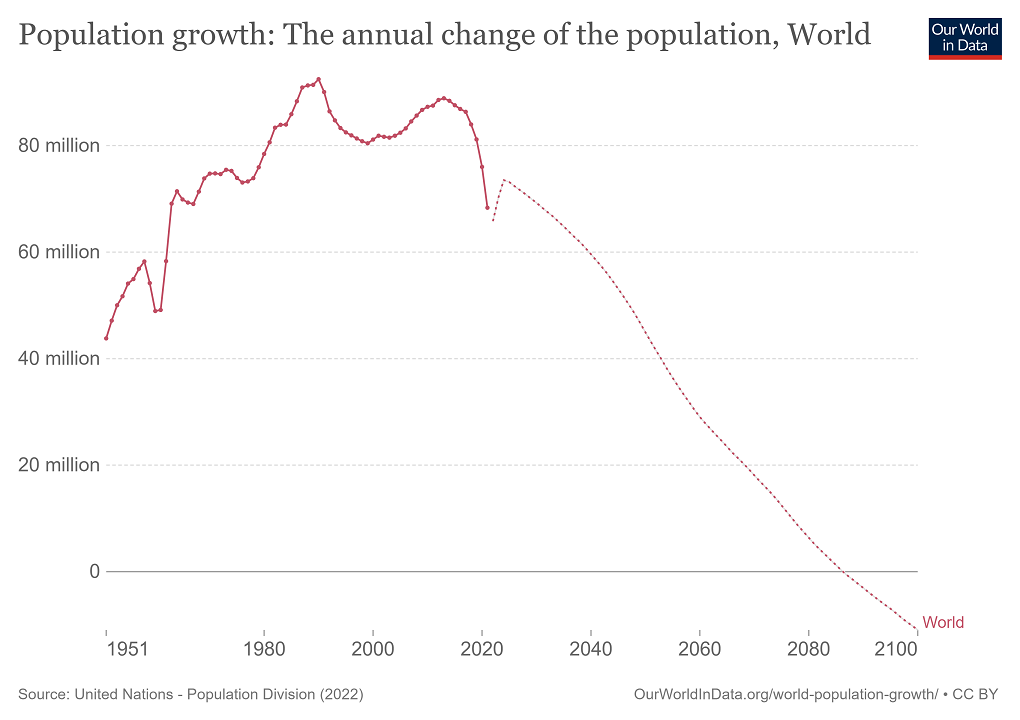

<br><div style="padding: 10px; font-size:20px; font-family:Serif"><h3 style= 'font-weight:bold'>How long did it take for the world population to growth?</h3><br>
The visualization shows how strongly the growth rate of the world population changed over time. In the past the population grew slowly: it took nearly seven centuries for the population to double from 0.25 billion (in the early 9th century) to 0.5 billion in the middle of the 16th century. As the growth rate slowly climbed, the population doubling time fell but remained in the order of centuries into the first half of the 20th century. Things sped up considerably in the middle of the 20th century.<br>
The fastest doubling of the world population happened between 1950 and 1987: a doubling from 2.5 to 5 billion people in just 37 years — the population doubled within a little more than one generation. This period was marked by a peak population growth of 2.1% in 1962.<br>
Since then, population growth has been slowing, and along with it the doubling time. In this visualisation we have used the UN projections to show how the doubling time is projected to change until the end of this century. By 2100, it will once again have taken approximately 100 years for the population to double to a predicted 10.8 billion.<br><br> 
What we can see is the interval between 1950 and 2100 wich is the prediction of the next years population growth rate by United Nations. This graph is good to understand what is the whole picture, but to match it with our prior line plot about trading records during the years we need to look at it from another angle. Now let's zoom into the dataset period between exactly 1988 to 2016 and see what's going on in that period.
</div>

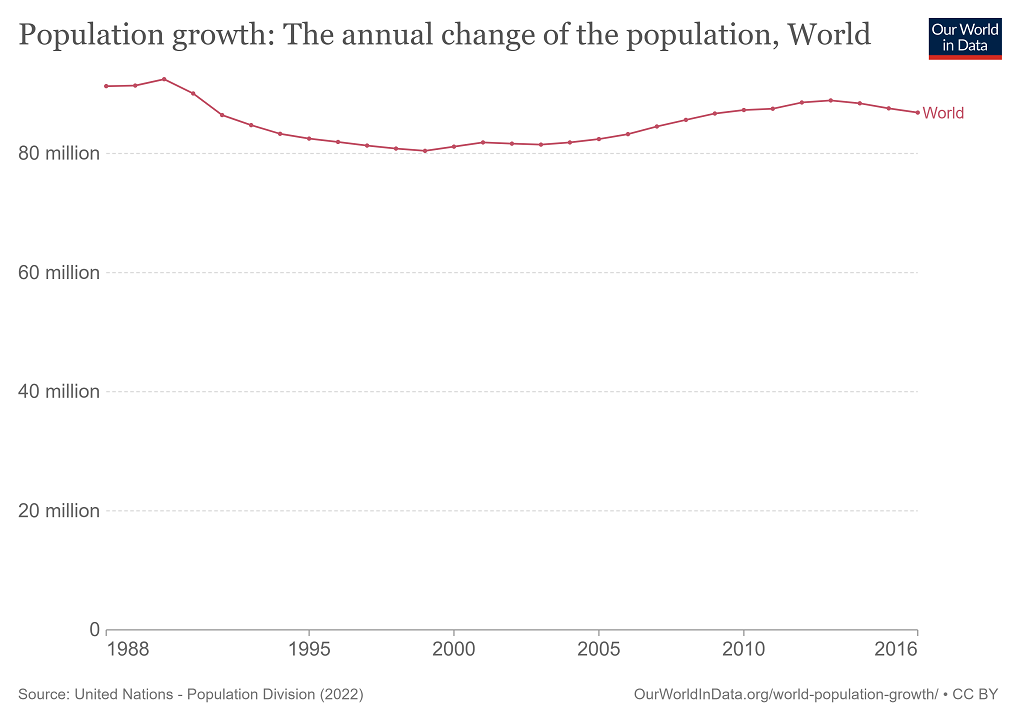

<br><p style= 'font-family:Garamond; font-size:20px'>Now look at this prediction of the population </p><br>

<br>![](https://ourworldindata.org/uploads/2019/06/2019-Revision-%E2%80%93-World-Population-Growth-1700-2100-772x550.png)

<br>

# <div style= 'font-family:Garamond; color:darkblue'><b>Question 3</b>. Global trades are mostly in which flow?<br>
<div style= 'font-family:Garamond; font-size:20px'>One of the most important elements of the understanding the economic trend for a country or for the entire planet is knowing that most of the trades have been done in importation or exportation.</div>

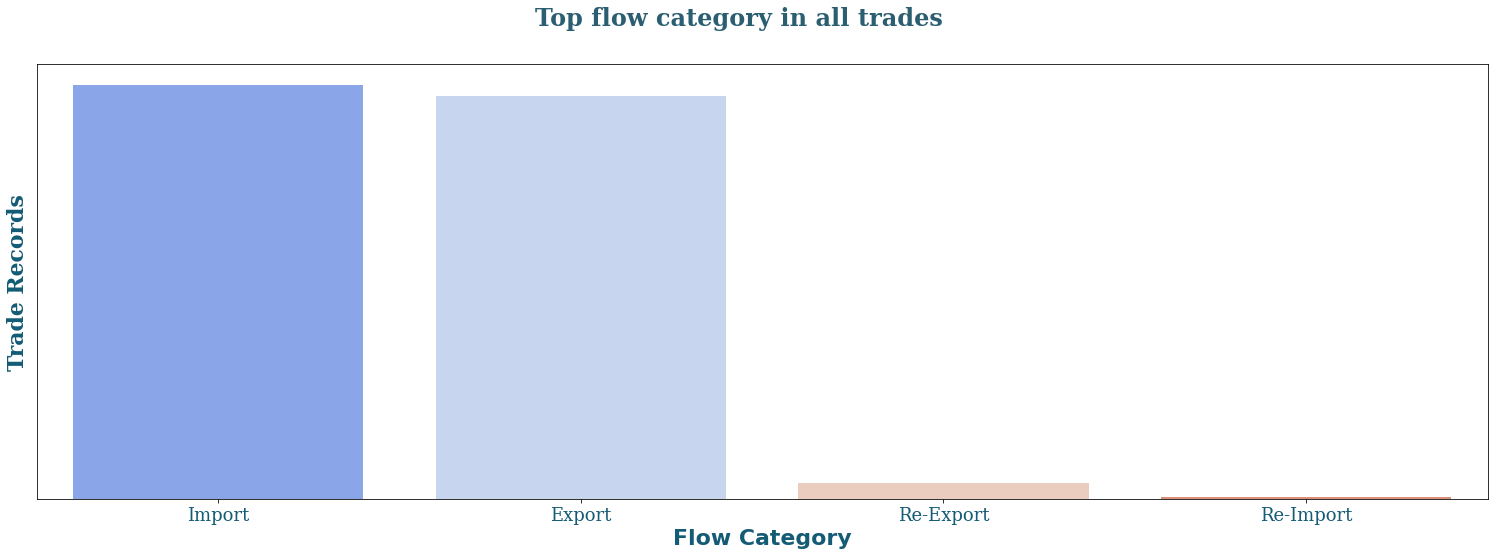

In [13]:
plt.subplots(figsize=(26, 8))
fl=df.groupby('flow', as_index=False).sum()
fls=fl.sort_values(by='trade_usd', ascending=False)
sns.barplot(data=fls, x='flow', y='trade_usd', palette='coolwarm')

plt.xticks(rotation=0, color='#145B75', ticks=None,fontfamily='Serif', fontsize=18)
plt.yticks([])

plt.xlabel('Flow Category', 
           fontsize=22,
          fontweight='bold',
          color='#145B75')
plt.ylabel('Trade Records',
          fontsize=22,
           fontfamily='Serif',
          fontweight='bold',
          color='#145B75')

plt.suptitle(
    "Top flow category in all trades",
    fontsize=24,
    fontfamily='Serif',
    fontweight='bold',
        ha="center",
    color='#2B5E71')

plt.show()

<div style= 'font-size:20px; font-family:Garamond'>We can see that importation has an slight advantage over exportation. We also can see that how much is the difference between their values:<br>
    <br>

| Flow Category | Trade Value (million USD) |
| :--- | :--------: |
| Import | \\$ 388, 178, 187 . 48 | 
|Export | \\$ 377, 433, 145 . 00 |
    
<div style= 'font-size:20px; font-family:Garamond'><br> 
    
<center>$(388,178,187.48 \times 10^6) - (377,433,145.0 \times 10^6) = 10,745,042.48$<center>

<br>Which is almost 10 billion dollars, and considering the 28 years of trading records, this number can be considered as an slight difference between two major categories.
    We also can show the equation with a simple line of code as below:</div>


In [14]:
fls.iloc[0,1]-fls.iloc[1,1]

10745042.48000002

<a id="1"></a><h1>Explanation and Observation</h1>

[1].   **Variance**: the difference between the observation average and sample average.

# Notebook under construction
This project is being updated daily